In [130]:
import pandas as pd
import requests
import json
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# ! mkdir ../output/sfari_json

In [107]:
def save_vars(ENSG):
    gene_id = ENSG # Replace with actual gene ID
    # GraphQL query string (removed clinvar_variants part)
    query = f"""
    {{
      gene(gene_id: "{gene_id}") {{
        variants {{
          consequence
          hgvs
          variant_id: variantId
        }}
      }}
    }}
    """
    
    # Define the endpoint
    url = "https://genomes.sfari.org/api"
    
    # Send the request to the API
    response = requests.post(url, json={'query': query})
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()

        if data['data']['gene'] is not None:            
            # Extract the relevant data from the JSON response
            variants = data['data']['gene']['variants']
    
            
            # Specify CSV file path
            output_file = '../output/sfari_json/' + gene_id + '.csv'
            
            # Write data to CSV
            with open(output_file, mode='w', newline='') as file:
                writer = csv.DictWriter(file, fieldnames=['variant_id', 'consequence', 'hgvs'])
                writer.writeheader()  # Write the header row
                
                # Write each variant to the CSV
                for variant in variants:
                    writer.writerow({
                        'variant_id': variant.get('variant_id'),
                        'consequence': variant.get('consequence'),
                        'hgvs': variant.get('hgvs')
                    })
            
            print(f"Data successfully written to {output_file}")
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")


# Single tfs

ERG

In [36]:
save_vars("ENSG00000157554")

Data successfully written to ../output/sfari_json/ENSG00000157554.csv


In [43]:
sfari_erg_vars = pd.read_csv("../output/sfari_json/ENSG00000157554.csv")
sfari_missense_erg_vars = sfari_erg_vars[sfari_erg_vars["consequence"] == "missense_variant"]
sfari_missense_erg_vars

,variant_id,consequence,hgvs
14,21-38383414-T-C,missense_variant,p.Thr484Ala
15,21-38383429-G-C,missense_variant,p.Pro479Ala
16,21-38383431-A-G,missense_variant,p.Met478Thr
17,21-38383437-C-G,missense_variant,p.Ser476Thr
18,21-38383438-T-C,missense_variant,p.Ser476Gly
...,...,...,...
503,21-38575670-G-A,missense_variant,p.His11Tyr
507,21-38575684-G-A,missense_variant,p.Pro6Leu
508,21-38575688-C-T,missense_variant,p.Val5Ile
509,21-38575690-G-A,missense_variant,p.Thr4Ile


In [44]:
all_TFs = pd.read_csv("../soto_analysis/outputs/all_TFs_table_proteins.txt", sep  = "\t", index_col = 0)
all_TFs[all_TFs["uniprotID"] == "P11308"]

,1,2,uniprotID,ENSG,ENST,DBD_coords,AD_coords,RD_coords,Bif_coords,length
861,NaN,NaN,P11308,NaN,ENST00000288319,312-391,"433-479,118-261",NaN,NaN,1


In [47]:
my_erg_all = pd.read_csv("../soto_analysis/outputs/mutations/cds_expanded_iWES_v2_variants_snv_classified/" + "ENST00000288319" + ".bed", sep = "\t", header = None)
my_erg_all["variant_id"] = my_erg_all[0].astype(str) + "-" + my_erg_all[2].astype(str) + "-" + my_erg_all[8].astype(str) + "-" + my_erg_all[9].astype(str)
my_erg_all_missense = my_erg_all[my_erg_all[13] == "No-Syn"]
my_erg_all_missense

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,variant_id
2,21,38383413,38383414,ENST00000288319,-1,21,38383413,38383414,T,G,0.000014,T,P,No-Syn,21-38383414-T-G
3,21,38383413,38383414,ENST00000288319,-1,21,38383413,38383414,T,C,0.000005,T,A,No-Syn,21-38383414-T-C
4,21,38383422,38383423,ENST00000288319,-1,21,38383422,38383423,G,A,0.000014,H,Y,No-Syn,21-38383423-G-A
5,21,38383428,38383429,ENST00000288319,-1,21,38383428,38383429,G,C,0.000061,P,A,No-Syn,21-38383429-G-C
6,21,38383430,38383431,ENST00000288319,-1,21,38383430,38383431,A,G,0.000005,M,T,No-Syn,21-38383431-A-G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,21,38445575,38445576,ENST00000288319,-1,21,38445575,38445576,C,G,0.000005,A,P,No-Syn,21-38445576-C-G
255,21,38445589,38445590,ENST00000288319,-1,21,38445589,38445590,G,A,0.000009,S,L,No-Syn,21-38445590-G-A
256,21,38445593,38445594,ENST00000288319,-1,21,38445593,38445594,G,C,0.000009,Q,E,No-Syn,21-38445594-G-C
258,21,38445608,38445609,ENST00000288319,-1,21,38445608,38445609,C,T,0.000009,V,I,No-Syn,21-38445609-C-T


In [48]:
pd.merge(my_erg_all_missense, sfari_missense_erg_vars, on = "variant_id")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,variant_id,consequence,hgvs
0,21,38383413,38383414,ENST00000288319,-1,21,38383413,38383414,T,C,0.000005,T,A,No-Syn,21-38383414-T-C,missense_variant,p.Thr484Ala
1,21,38383428,38383429,ENST00000288319,-1,21,38383428,38383429,G,C,0.000061,P,A,No-Syn,21-38383429-G-C,missense_variant,p.Pro479Ala
2,21,38383430,38383431,ENST00000288319,-1,21,38383430,38383431,A,G,0.000005,M,T,No-Syn,21-38383431-A-G,missense_variant,p.Met478Thr
3,21,38383436,38383437,ENST00000288319,-1,21,38383436,38383437,C,G,0.000005,S,T,No-Syn,21-38383437-C-G,missense_variant,p.Ser476Thr
4,21,38383437,38383438,ENST00000288319,-1,21,38383437,38383438,T,C,0.000009,S,G,No-Syn,21-38383438-T-C,missense_variant,p.Ser476Gly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21,38445575,38445576,ENST00000288319,-1,21,38445575,38445576,C,G,0.000005,A,P,No-Syn,21-38445576-C-G,missense_variant,p.Ala29Pro
96,21,38445589,38445590,ENST00000288319,-1,21,38445589,38445590,G,A,0.000009,S,L,No-Syn,21-38445590-G-A,missense_variant,p.Ser24Leu
97,21,38445593,38445594,ENST00000288319,-1,21,38445593,38445594,G,C,0.000009,Q,E,No-Syn,21-38445594-G-C,missense_variant,p.Gln23Glu
98,21,38445608,38445609,ENST00000288319,-1,21,38445608,38445609,C,T,0.000009,V,I,No-Syn,21-38445609-C-T,missense_variant,p.Val18Ile


In [54]:
len(my_erg_all_missense[~my_erg_all_missense["variant_id"].isin(sfari_erg_vars["variant_id"])])

26

In [55]:
len(my_erg_all_missense[~my_erg_all_missense["variant_id"].isin(sfari_missense_erg_vars["variant_id"])])

28

In [66]:
sfari_missense_erg_vars[1] = sfari_missense_erg_vars["variant_id"].str.split("-").str[1].astype(int)
sfari_missense_erg_vars

/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_3752/3683839582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfari_missense_erg_vars[1] = sfari_missense_erg_vars["variant_id"].str.split("-").str[1].astype(int)


,variant_id,consequence,hgvs,1
14,21-38383414-T-C,missense_variant,p.Thr484Ala,38383414
15,21-38383429-G-C,missense_variant,p.Pro479Ala,38383429
16,21-38383431-A-G,missense_variant,p.Met478Thr,38383431
17,21-38383437-C-G,missense_variant,p.Ser476Thr,38383437
18,21-38383438-T-C,missense_variant,p.Ser476Gly,38383438
...,...,...,...,...
503,21-38575670-G-A,missense_variant,p.His11Tyr,38575670
507,21-38575684-G-A,missense_variant,p.Pro6Leu,38575684
508,21-38575688-C-T,missense_variant,p.Val5Ile,38575688
509,21-38575690-G-A,missense_variant,p.Thr4Ile,38575690


In [56]:
my_erg_all_missense[~my_erg_all_missense["variant_id"].isin(sfari_missense_erg_vars["variant_id"])]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,variant_id
2,21,38383413,38383414,ENST00000288319,-1,21,38383413,38383414,T,G,0.000014,T,P,No-Syn,21-38383414-T-G
4,21,38383422,38383423,ENST00000288319,-1,21,38383422,38383423,G,A,0.000014,H,Y,No-Syn,21-38383423-G-A
10,21,38383469,38383470,ENST00000288319,-1,21,38383469,38383470,C,T,0.000014,G,E,No-Syn,21-38383470-C-T
11,21,38383476,38383477,ENST00000288319,-1,21,38383476,38383477,G,C,0.000005,P,A,No-Syn,21-38383477-G-C
26,21,38383545,38383546,ENST00000288319,-1,21,38383545,38383546,G,T,0.000005,P,T,No-Syn,21-38383546-G-T
33,21,38383590,38383591,ENST00000288319,-1,21,38383590,38383591,T,C,0.000005,M,V,No-Syn,21-38383591-T-C
47,21,38383634,38383635,ENST00000288319,-1,21,38383634,38383635,G,A,0.000005,P,L,No-Syn,21-38383635-G-A
79,21,38383815,38383816,ENST00000288319,-1,21,38383815,38383816,C,T,0.000014,D,N,No-Syn,21-38383816-C-T
82,21,38383821,38383822,ENST00000288319,-1,21,38383821,38383822,T,G,0.000014,M,L,No-Syn,21-38383822-T-G
89,21,38383859,38383860,ENST00000288319,-1,21,38383859,38383860,C,T,0.000009,S,N,No-Syn,21-38383860-C-T


nr4a2

In [76]:
save_vars("ENSG00000153234")

Data successfully written to ../output/sfari_json/ENSG00000153234.csv


In [69]:
sfari_nr4a2_vars = pd.read_csv("../output/sfari_json/ENSG00000153234.csv")
sfari_missense_nr4a2_vars = sfari_nr4a2_vars[sfari_nr4a2_vars["consequence"] == "missense_variant"]
sfari_missense_nr4a2_vars

,variant_id,consequence,hgvs
11,2-156325772-T-C,missense_variant,p.Lys590Arg
14,2-156325780-T-A,missense_variant,p.Asn553Tyr
15,2-156325781-A-T,missense_variant,p.Ile587Lys
16,2-156325789-C-T,missense_variant,p.Ala550Thr
17,2-156325794-G-C,missense_variant,p.Pro583Ala
...,...,...,...
505,2-156330090-C-T,missense_variant,p.Asp33Asn
511,2-156330138-G-C,missense_variant,p.Pro17Ala
514,2-156330158-G-C,missense_variant,p.Ser10Cys
515,2-156330164-T-C,missense_variant,p.Tyr8Cys


In [70]:
all_TFs[all_TFs["uniprotID"] == "P43354"]

,1,2,uniprotID,ENSG,ENST,DBD_coords,AD_coords,RD_coords,Bif_coords,length
966,NaN,NaN,P43354,NaN,ENST00000339562,261-330,"1-91,584-598",NaN,NaN,1


In [73]:
my_nr4a2_all = pd.read_csv("../soto_analysis/outputs/mutations/cds_expanded_iWES_v2_variants_snv_classified/" + "ENST00000339562" + ".bed", sep = "\t", header = None)
my_nr4a2_all["variant_id"] = my_nr4a2_all[0].astype(str) + "-" + my_nr4a2_all[2].astype(str) + "-" + my_nr4a2_all[8].astype(str) + "-" + my_nr4a2_all[9].astype(str)
my_nr4a2_all_missense = my_nr4a2_all[my_nr4a2_all[13] == "No-Syn"]
my_nr4a2_all_missense

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,variant_id
1,2,156325771,156325772,ENST00000339562,-1,2,156325771,156325772,T,C,0.000005,K,R,No-Syn,2-156325772-T-C
2,2,156325774,156325775,ENST00000339562,-1,2,156325774,156325775,T,C,0.000005,D,G,No-Syn,2-156325775-T-C
4,2,156325780,156325781,ENST00000339562,-1,2,156325780,156325781,A,T,0.000009,I,K,No-Syn,2-156325781-A-T
6,2,156325793,156325794,ENST00000339562,-1,2,156325793,156325794,G,C,0.000005,P,A,No-Syn,2-156325794-G-C
11,2,156325828,156325829,ENST00000339562,-1,2,156325828,156325829,T,C,0.000005,Q,R,No-Syn,2-156325829-T-C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2,156330116,156330117,ENST00000339562,-1,2,156330116,156330117,A,T,0.000005,Y,N,No-Syn,2-156330117-A-T
342,2,156330137,156330138,ENST00000339562,-1,2,156330137,156330138,G,C,0.000009,P,A,No-Syn,2-156330138-G-C
346,2,156330157,156330158,ENST00000339562,-1,2,156330157,156330158,G,C,0.000023,S,C,No-Syn,2-156330158-G-C
347,2,156330163,156330164,ENST00000339562,-1,2,156330163,156330164,T,C,0.000009,Y,C,No-Syn,2-156330164-T-C


In [74]:
pd.merge(my_nr4a2_all_missense, sfari_missense_nr4a2_vars, on = "variant_id")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,variant_id,consequence,hgvs
0,2,156325771,156325772,ENST00000339562,-1,2,156325771,156325772,T,C,0.000005,K,R,No-Syn,2-156325772-T-C,missense_variant,p.Lys590Arg
1,2,156325780,156325781,ENST00000339562,-1,2,156325780,156325781,A,T,0.000009,I,K,No-Syn,2-156325781-A-T,missense_variant,p.Ile587Lys
2,2,156325793,156325794,ENST00000339562,-1,2,156325793,156325794,G,C,0.000005,P,A,No-Syn,2-156325794-G-C,missense_variant,p.Pro583Ala
3,2,156325840,156325841,ENST00000339562,-1,2,156325840,156325841,G,A,0.000042,T,I,No-Syn,2-156325841-G-A,missense_variant,p.Thr567Ile
4,2,156325853,156325854,ENST00000339562,-1,2,156325853,156325854,G,A,0.000014,R,C,No-Syn,2-156325854-G-A,missense_variant,p.Arg563Cys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2,156330089,156330090,ENST00000339562,-1,2,156330089,156330090,C,T,0.000019,D,N,No-Syn,2-156330090-C-T,missense_variant,p.Asp33Asn
132,2,156330137,156330138,ENST00000339562,-1,2,156330137,156330138,G,C,0.000009,P,A,No-Syn,2-156330138-G-C,missense_variant,p.Pro17Ala
133,2,156330157,156330158,ENST00000339562,-1,2,156330157,156330158,G,C,0.000023,S,C,No-Syn,2-156330158-G-C,missense_variant,p.Ser10Cys
134,2,156330163,156330164,ENST00000339562,-1,2,156330163,156330164,T,C,0.000009,Y,C,No-Syn,2-156330164-T-C,missense_variant,p.Tyr8Cys


# Iterate through all SFARI TFs

In [111]:
SFARI_TFs = pd.read_csv("../data/SFARI_TFs_with_ENST.csv")#[["ensembl-id"]]
SFARI_TFs = SFARI_TFs[["ensembl-id", "uniprotID"]]
SFARI_TFs

,ensembl-id,uniprotID
0,ENSG00000101126,Q9H2P0
1,ENSG00000126705,Q5TGY3
2,ENSG00000189079,Q68CP9
3,ENSG00000172379,Q9HBZ2
4,ENSG00000004848,Q96QS3
...,...,...
117,ENSG00000147180,Q9Y462
118,ENSG00000178665,Q8N859
119,ENSG00000196391,Q6NX45
120,ENSG00000170396,Q7Z570


In [114]:
all_TFs = pd.merge(all_TFs, SFARI_TFs, on = "uniprotID")
all_TFs

,1,2,uniprotID,ENSG,ENST,DBD_coords,AD_coords,RD_coords,Bif_coords,length,ensembl-id
0,NaN,NaN,O14529,NaN,ENST00000261726,"549-627,892-967,1043-1120,1169-1225",NaN,NaN,NaN,1,ENSG00000111249
1,NaN,NaN,O95096,NaN,ENST00000377142,129-185,220-273,NaN,NaN,1,ENSG00000125820
2,NaN,NaN,O95365,NaN,ENST00000322357,"382-404,410-432,438-460,466-487",NaN,NaN,NaN,1,ENSG00000178951
3,NaN,NaN,P10589,NaN,ENST00000327111,84-153,NaN,NaN,NaN,1,ENSG00000175745
4,NaN,NaN,P12755,NaN,ENST00000378536,1-728,NaN,NaN,NaN,1,ENSG00000157933
...,...,...,...,...,...,...,...,...,...,...,...
117,NaN,NaN,Q9UPW6,NaN,ENST00000260926,"355-434,479-557,615-672",NaN,NaN,NaN,1,ENSG00000119042
118,NaN,NaN,Q9Y2K7,NaN,ENST00000529006,563-609,NaN,NaN,NaN,1,ENSG00000173120
119,NaN,NaN,Q9Y458,NaN,ENST00000373294,94-283,402-481,NaN,NaN,1,ENSG00000122145
120,NaN,NaN,Q9Y462,NaN,ENST00000276123,"383-405,414-436,476-499,505-527,533-556,562-58...",NaN,NaN,NaN,1,ENSG00000147180


In [109]:
for ENSG in SFARI_TFs["ensembl-id"]:
    save_vars(ENSG)

Data successfully written to ../output/sfari_json/ENSG00000101126.csv
Data successfully written to ../output/sfari_json/ENSG00000126705.csv
Data successfully written to ../output/sfari_json/ENSG00000189079.csv
Data successfully written to ../output/sfari_json/ENSG00000172379.csv
Data successfully written to ../output/sfari_json/ENSG00000004848.csv
Data successfully written to ../output/sfari_json/ENSG00000116539.csv
Data successfully written to ../output/sfari_json/ENSG00000123636.csv
Data successfully written to ../output/sfari_json/ENSG00000119866.csv
Data successfully written to ../output/sfari_json/ENSG00000130940.csv
Data successfully written to ../output/sfari_json/ENSG00000132024.csv
Data successfully written to ../output/sfari_json/ENSG00000108509.csv
Data successfully written to ../output/sfari_json/ENSG00000198824.csv
Data successfully written to ../output/sfari_json/ENSG00000079432.csv
Data successfully written to ../output/sfari_json/ENSG00000102974.csv
Data successfully wr

In [174]:
ensgs = []
ensts = []

sfari_count = []
my_count = []
overlap_count = []

for i in all_TFs.index: 
    ENSG = all_TFs["ensembl-id"].iloc[i]
    ENST = all_TFs["ENST"].iloc[i]

    if type(ENSG) == str:
        sfari_vars = pd.read_csv("../output/sfari_json/" + ENSG + ".csv")
        sfari_missense_vars = sfari_vars[sfari_vars["consequence"] == "missense_variant"]
    
        my_vars = pd.read_csv("../soto_analysis/outputs/mutations/cds_expanded_iWES_v2_variants_snv_classified/" + ENST + ".bed", sep = "\t", header = None)
        my_vars["variant_id"] = my_vars[0].astype(str) + "-" + my_vars[2].astype(str) + "-" + my_vars[8].astype(str) + "-" + my_vars[9].astype(str)
        my_vars_all_missense = my_vars[my_vars[13] == "No-Syn"]
    
        overlap = pd.merge(my_vars_all_missense, sfari_missense_vars, on = "variant_id")
    
        ensgs.append(ENSG)
        ensts.append(ENST)
        sfari_count.append(len( sfari_missense_vars))
        my_count.append(len(my_vars_all_missense))
        overlap_count.append(len(overlap))

summary_df = pd.DataFrame({"ENSG" : ensgs, "ENST" : ensts, "SFARI" : sfari_count, "my_count" : my_count, "overlap" : overlap_count})
summary_df

,ENSG,ENST,SFARI,my_count,overlap
0,ENSG00000111249,ENST00000261726,446,488,400
1,ENSG00000125820,ENST00000377142,92,116,87
2,ENSG00000178951,ENST00000322357,171,198,155
3,ENSG00000175745,ENST00000327111,73,81,62
4,ENSG00000157933,ENST00000378536,241,295,225
...,...,...,...,...,...
116,ENSG00000119042,ENST00000260926,139,155,132
117,ENSG00000173120,ENST00000529006,216,233,186
118,ENSG00000122145,ENST00000373294,110,127,94
119,ENSG00000147180,ENST00000276123,136,160,119


In [177]:
summary_df["diff_prop"] = (summary_df["my_count"] - summary_df["SFARI"]) / summary_df["my_count"]
summary_df["diff"] = summary_df["my_count"] - summary_df["SFARI"]
summary_df

,ENSG,ENST,SFARI,my_count,overlap,diff_prop,diff
0,ENSG00000111249,ENST00000261726,446,488,400,0.086066,42
1,ENSG00000125820,ENST00000377142,92,116,87,0.206897,24
2,ENSG00000178951,ENST00000322357,171,198,155,0.136364,27
3,ENSG00000175745,ENST00000327111,73,81,62,0.098765,8
4,ENSG00000157933,ENST00000378536,241,295,225,0.183051,54
...,...,...,...,...,...,...,...
116,ENSG00000119042,ENST00000260926,139,155,132,0.103226,16
117,ENSG00000173120,ENST00000529006,216,233,186,0.072961,17
118,ENSG00000122145,ENST00000373294,110,127,94,0.133858,17
119,ENSG00000147180,ENST00000276123,136,160,119,0.150000,24


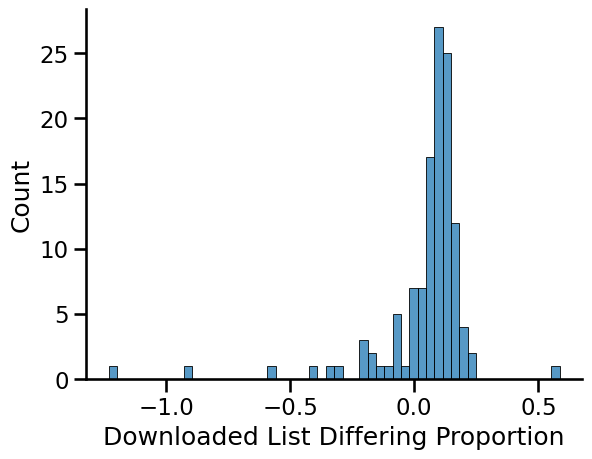

In [180]:
sns.set_context('talk')
sns.histplot(data = summary_df, x = "diff_prop")
plt.xlabel("Downloaded List Differing Proportion")
sns.despine()

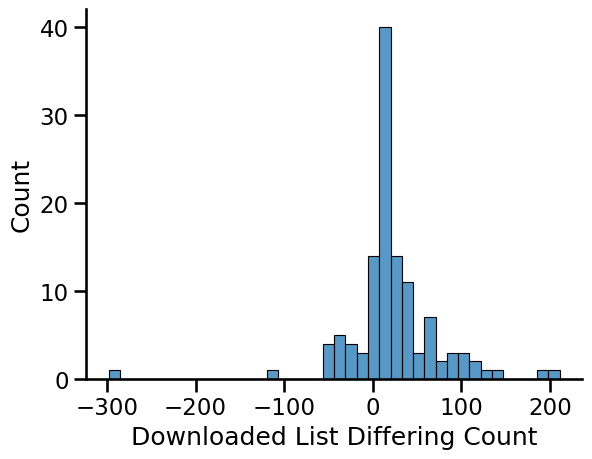

In [181]:
sns.set_context('talk')
sns.histplot(data = summary_df, x = "diff")
plt.xlabel("Downloaded List Differing Count")
sns.despine()

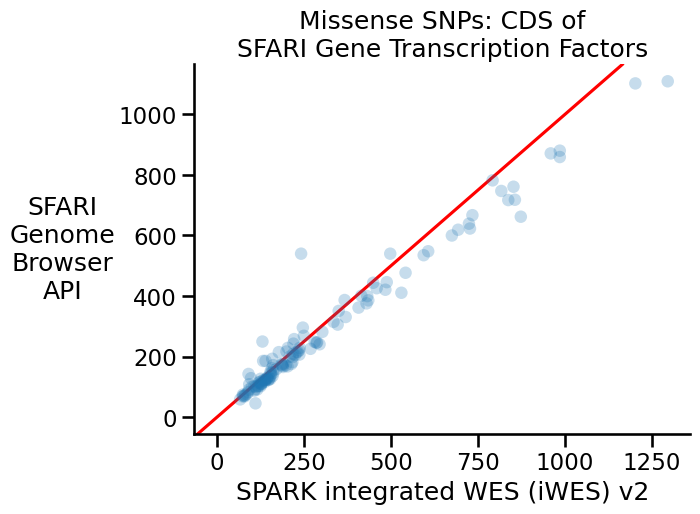

In [195]:
sns.set_context('talk')
plt.axline([0, 0], slope=1, color = "red")
sns.scatterplot(data = summary_df, x = "my_count", y = "SFARI", alpha = 0.25, zorder = 10, edgecolor = 'none')
plt.xlabel("SPARK integrated WES (iWES) v2")
plt.ylabel("SFARI\nGenome\nBrowser\nAPI", rotation = 0, labelpad = 40, va = 'center')
plt.title("Missense SNPs: CDS of\nSFARI Gene Transcription Factors")
sns.despine()

In [198]:
summary_df[(summary_df["SFARI"] > 500) & (summary_df["my_count"] < 300)]

,ENSG,ENST,SFARI,my_count,overlap,diff_prop,diff
75,ENSG00000257923,ENST00000292538,540,242,200,-1.231405,-298


In [199]:
len(summary_df)

121

In [205]:
activator_SFARI_TFs = summary_df[summary_df["ENST"].isin(all_TFs.dropna(subset = ["AD_coords"])["ENST"])]
activator_SFARI_TFs

,ENSG,ENST,SFARI,my_count,overlap,diff_prop,diff
1,ENSG00000125820,ENST00000377142,92,116,87,0.206897,24
7,ENSG00000126368,ENST00000246672,199,218,182,0.087156,19
8,ENSG00000100811,ENST00000262238,83,90,65,0.077778,7
10,ENSG00000115507,ENST00000282549,88,108,81,0.185185,20
11,ENSG00000120149,ENST00000239243,111,126,101,0.119048,15
13,ENSG00000069011,ENST00000265340,127,126,99,-0.007937,-1
14,ENSG00000141646,ENST00000342988,71,77,60,0.077922,6
16,ENSG00000188786,ENST00000373036,176,214,169,0.177570,38
24,ENSG00000174332,ENST00000312233,282,303,253,0.069307,21
28,ENSG00000004848,ENST00000379044,132,146,119,0.095890,14


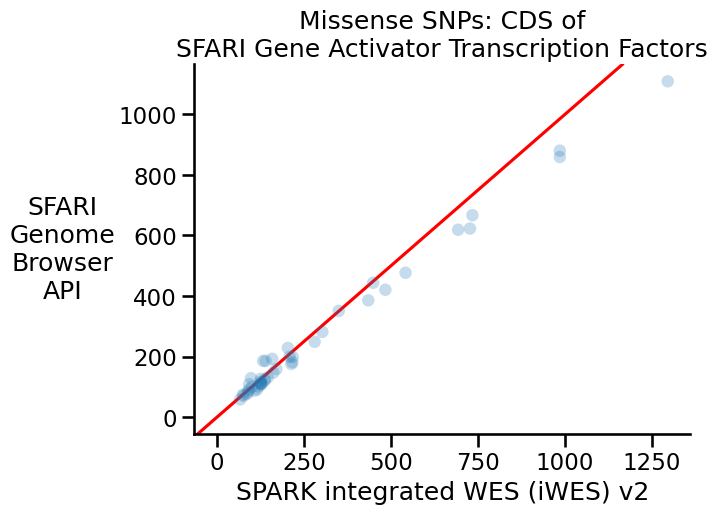

In [207]:
sns.set_context('talk')
plt.axline([0, 0], slope=1, color = "red")
sns.scatterplot(data = activator_SFARI_TFs, x = "my_count", y = "SFARI", alpha = 0.25, zorder = 10, edgecolor = 'none')
plt.xlabel("SPARK integrated WES (iWES) v2")
plt.ylabel("SFARI\nGenome\nBrowser\nAPI", rotation = 0, labelpad = 40, va = 'center')
plt.title("Missense SNPs: CDS of\nSFARI Gene Activator Transcription Factors")
sns.despine()